In [52]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

In [53]:
# load the data
validation_folder = 'validations'
validation_file = 'hhar_features_validation_simple_validation.pkl'
validation_path = os.path.join(validation_folder, validation_file)
with open(validation_path, 'rb') as f:
    data = pickle.load(f)

In [54]:
data

{0: {0: {'individual': [{'task': 0,
     'task_validation_loss': 0.7031041383743286,
     'task_accuracy': 91.1504424778761,
     'correct': 1442},
    {'task': 1,
     'task_validation_loss': 2.8545470237731934,
     'task_accuracy': 0.9299442033477991,
     'correct': 15},
    {'task': 2,
     'task_validation_loss': 2.2437357902526855,
     'task_accuracy': 8.084772370486656,
     'correct': 103}],
   'overall': {'total_validation_accuracy': 34.907138062206315,
    'total_loss': 5.8013869524002075,
    'total_correct': 1560}},
  1: {'individual': [{'task': 0,
     'task_validation_loss': 0.5089532732963562,
     'task_accuracy': 92.98356510745892,
     'correct': 1471},
    {'task': 1,
     'task_validation_loss': 3.3052146434783936,
     'task_accuracy': 1.115933044017359,
     'correct': 18},
    {'task': 2,
     'task_validation_loss': 2.613192081451416,
     'task_accuracy': 6.750392464678178,
     'correct': 86}],
   'overall': {'total_validation_accuracy': 35.24278362049675,
 

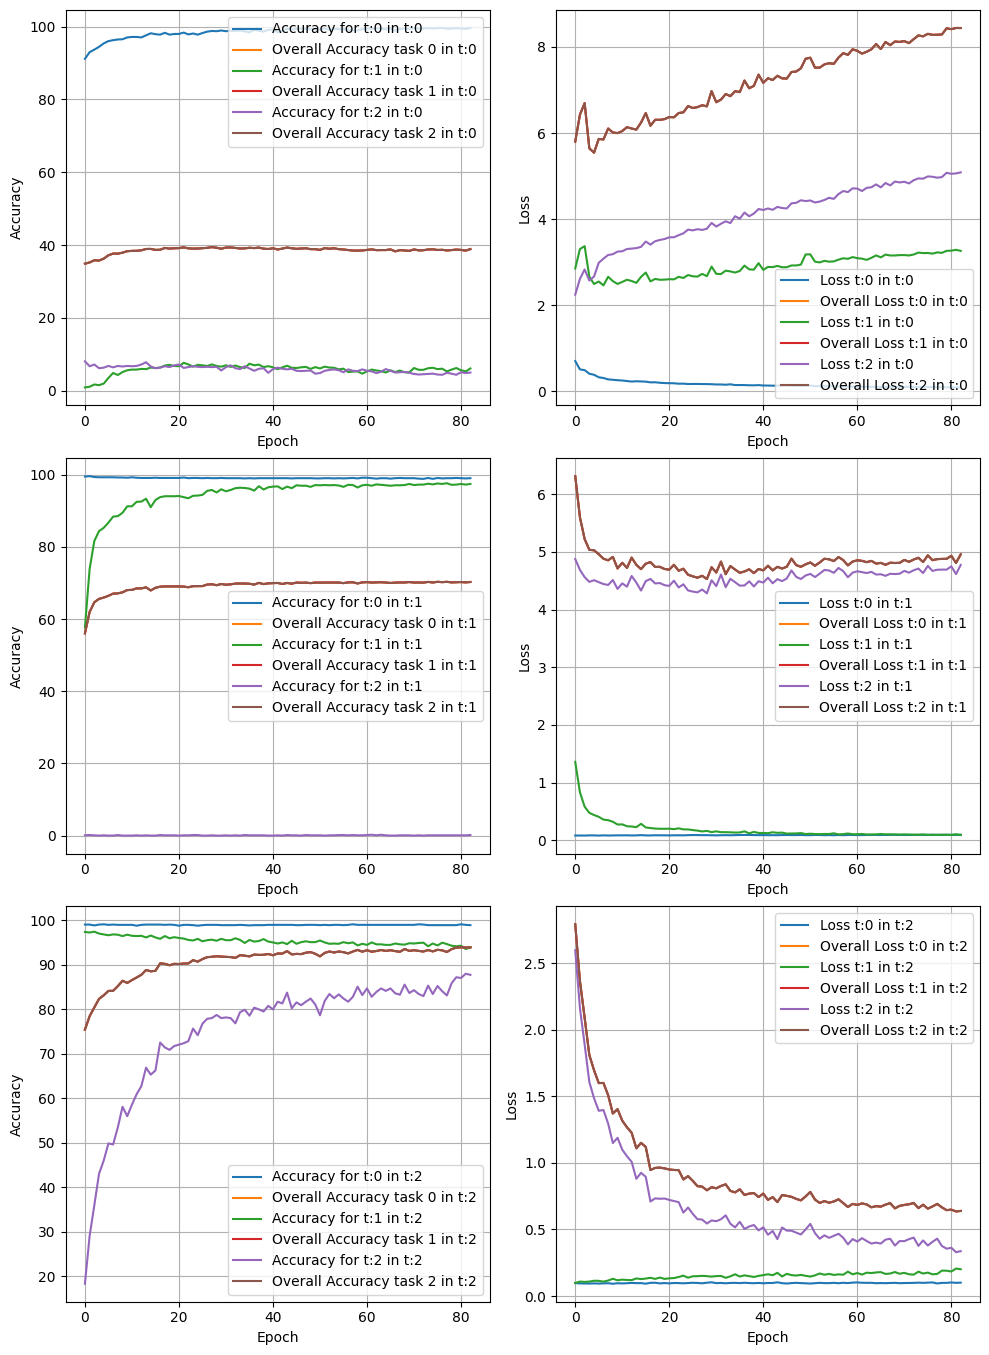

In [89]:
fig, axes = plt.subplots(len(data.keys()), 2,figsize=(10, 5* len(data.keys())))
valid_acc = []
for task in data.keys():
    # go through epoch
    # print(data[task][0]['overall'])
    
    #get the validation loss for each task
    valid_loss = []
    task_valid_acc = []
    for validation_task in data.keys():
        # this is getting all the values for one first which makes sense
        all_valid_task_loss = [data[task][i]['individual'][validation_task]['task_validation_loss'] for i in data[task].keys()]
        all_valid_task_acc = [data[task][i]['individual'][validation_task]['task_accuracy'] for i in data[task].keys()]
        #overall accuracy
        total_valid_task_loss = [data[task][i]['overall']['total_validation_accuracy'] for i in data[task].keys()]
        #overall loss
        total_valid_task_acc = [data[task][i]['overall']['total_loss'] for i in data[task].keys()]
        axes[task,0].plot(range(len(data[task].keys())), all_valid_task_acc, label=f"Accuracy for t:{validation_task} in t:{task}")
        axes[task,0].plot(range(len(data[task].keys())), total_valid_task_loss, label=f"Overall Accuracy task {validation_task} in t:{task}")
        axes[task,0].plot()
        axes[task,0].legend()
        
        axes[task,1].plot(range(len(data[task].keys())), all_valid_task_loss, label=f"Loss t:{validation_task} in t:{task}")
        axes[task,1].plot(range(len(data[task].keys())), total_valid_task_acc, label=f"Overall Loss t:{validation_task} in t:{task}")
        axes[task,1].legend()
        # move the legend so it does not obscure the plot to the top
        # axes[task,0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
        #   ncol=3, fancybox=True, shadow=True)
        
        # add gridlines to both
        axes[task,0].grid()
        axes[task,1].grid()
        # add x label of epoch
        axes[task,0].set_xlabel('Epoch')
        axes[task,1].set_xlabel('Epoch')
        # add y label of accuracy for the first one
        axes[task,0].set_ylabel('Accuracy')
        axes[task,1].set_ylabel('Loss')
        
        
        
        task_valid_acc.append(all_valid_task_loss)
        
    valid_acc.append(task_valid_acc)
    
# print(valid_acc)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig(f"plots/plot_{validation_file.split('.')[0]}.png")

plt.show()
# save the plot as an image to the folder plots and have the name be in the format plot_<FileName>.png
# plt.savefig(f"plots/plot_{validation_file.split('.')[0]}.png")

    